# Object Detection

---
## Template Matching (影像比對)



`cv2.matchTemplate()` [documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html)

`cv2.minMaxLoc()` [documentation](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html?highlight=minmaxloc#cv2.minMaxLoc)


[tutorial](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html) provided by OpenCV

**缺點：當遇到與template較不同(大小、方向、角度)的影像會有不好的效果**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

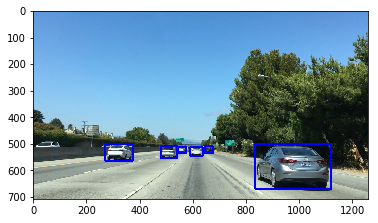

In [2]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


def find_matches(img, template_list):
    bbox_list = []
    method = cv2.TM_CCOEFF_NORMED   # cv2.TM_SQDIFF, cv2.TM_CCOEFF_NORMED
    # Apply template Matching
    for template in template_list:
        template = cv2.imread(template)
        # template = mpimg.imread(template)
        w, h = template.shape[1::-1]

        res = cv2.matchTemplate(img,template, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        bbox_list.append((top_left, bottom_right))
    return bbox_list


template_list = ['./images/cutout1.jpg', './images/cutout2.jpg', './images/cutout3.jpg', 
                 './images/cutout4.jpg', './images/cutout5.jpg', './images/cutout6.jpg']
image_path = './images/bbox-example-image.jpg'
img = cv2.imread(image_path)

bboxes = find_matches(img, template_list)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = draw_boxes(img, bboxes)

plt.imshow(result)

---
## Histogram comparison

利用顏色分佈比對汽車，但是會**遇到同種車款不同顏色的問題**。

然而我們可以轉到其他色域來看，像圖片中**汽車顏色的飽和度較高**，可以用hsv等等方法區別開來。

```
hist, bins = np.histogram(image[:,:,0], bins=32, range=(0, 256))

output:
(array([399, 448, 300, 238, 191, 279, 419, 424, 252, 174, 214, 297, 263, 196, 121, 111, 100, 113, 105,  91, 110, 132, 129, 133, 161, 170, 146, 158, 219, 261, 275,  49]),
array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80., 88.,  96., 104., 112., 120., 128., 136., 144., 152., 160., 168., 176., 184., 192., 200., 208., 216., 224., 232., 240., 248., 256.]))
```

bins: 0~255像數分為32個區塊，ex:0~8, 8~16, 16~24....以此類推

hist: 為每個區塊內pixels的加總，ex:0~8區間的像素總共有399個


Text(0.5,1,'B Histogram')

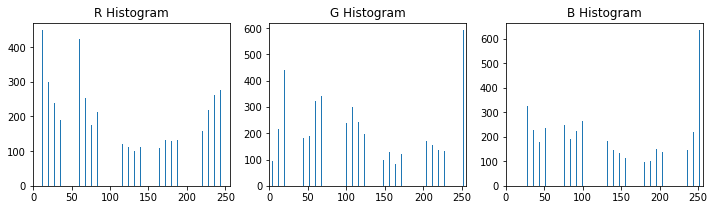

In [18]:
# Read in the image
image = mpimg.imread('./images/cutout1.jpg')

# Take histograms in R, G, and B
rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))

# Generating bin centers
bin_edges = rhist[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')

---
## 3D Plots

In [19]:
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

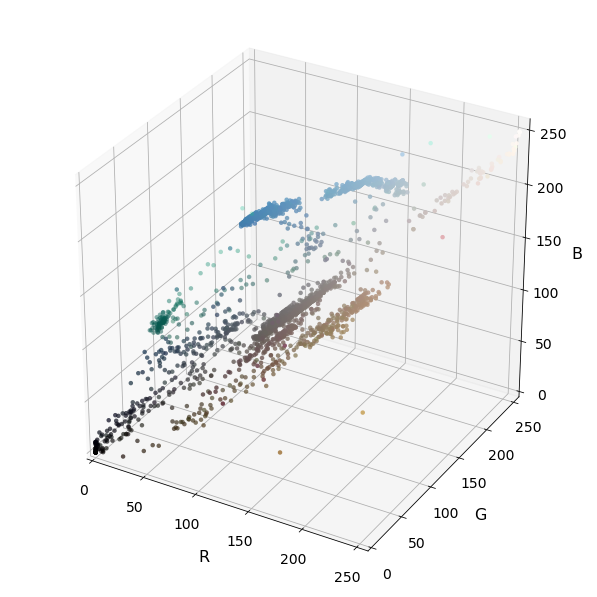

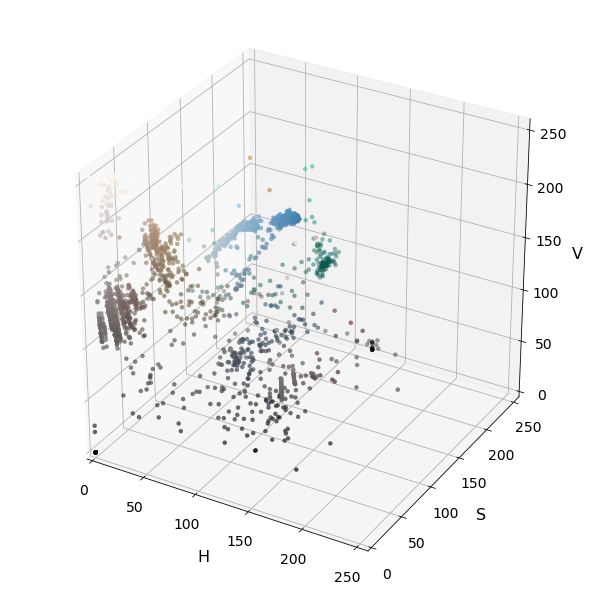

In [20]:
img = cv2.imread("./images/signs_vehicles_xygrad.png")
# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

---
## HOG (Histogram of Oriented Gradients)

```
from skimage.feature import hog
pix_per_cell = 8
cell_per_block = 2
orient = 9

hog_features, hog_image = hog(img, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=False,
                          block_norm="L2-Hys")

orientations: integer,ex:input9 360度會被分為9個方向
pixels_per_cell:  parameter specifies the cell size over which each gradient histogram is computed.
cells_per_block: specifies the local area over which the histogram counts in a given cell will be normalized.
(optional)transform_sqrt: power law or "gamma" normalization scheme.
visualise: True, 輸出HOG圖 = hog_image
feature_vector: True, 由7*7*2*2*9 -> 1764維輸出 = hog_features
```
![](./images/hog-visualization.jpg)

![](./images/car-and-hog.jpg)